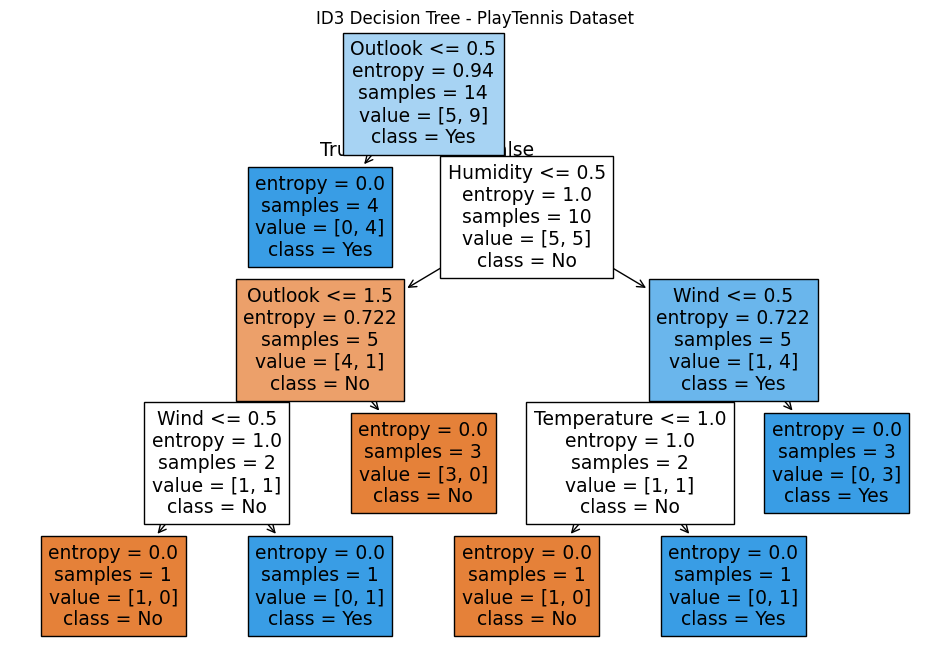

Prediction for sample [Sunny, Cool, High, Strong]: ['No']


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Full PlayTennis dataset
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode categorical features and target
label_encoders = {}
for column in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']:
    le = LabelEncoder()
    df[column + '_enc'] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
feature_cols = ['Outlook_enc', 'Temperature_enc', 'Humidity_enc', 'Wind_enc']
X = df[feature_cols].values
y = df['PlayTennis_enc'].values

# Train Decision Tree (ID3 with entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(clf,
          feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],
          class_names=label_encoders['PlayTennis'].classes_,
          filled=True)
plt.title("ID3 Decision Tree - PlayTennis Dataset")
plt.show()

# Test sample: Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong
test_sample = [
    label_encoders['Outlook'].transform(['Sunny'])[0],
    label_encoders['Temperature'].transform(['Cool'])[0],
    label_encoders['Humidity'].transform(['High'])[0],
    label_encoders['Wind'].transform(['Strong'])[0]
]

pred = clf.predict([test_sample])
print("Prediction for sample [Sunny, Cool, High, Strong]:", label_encoders['PlayTennis'].inverse_transform(pred))
